In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import make_lupton_rgb
from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
M32_mask1 = fits.open("zspec.M32RA1.fits") #m32ra1
M32_mask2 = fits.open("zspec.M32RB1.fits") #m32rb1
M32_mask3 = fits.open("zspec.M32RB2.fits") #m32rb2
M32_mask4 = fits.open("zspec.M32RC1.fits") #m32rc1
M32_mask5 = fits.open("zspec.M32RC2.fits") #m32rc2
M32_mask6 = fits.open("zspec.M32RD1.fits") #m32rd1
M32_mask7 = fits.open("zspec.M32RD2.fits") #m32rd2

M32_mask8 = fits.open("zspec.M32RE1.fits") #M32re2b
M32_mask9 = fits.open("zspec.M32RE2B.fits") #m31re2b
M31_mask1 = fits.open("zspec.M31SR5.fits") #m31sr5
M31_mask2 = fits.open("zspec.M31SR6.fits") #m31sr6
M31_mask3 = fits.open("zspec.M31SRa.fits") #m31sra
M31_mask4 = fits.open("zspec.M31SRc.fits") #m31src
M31_mask5 = fits.open("zspec.M31SRd.fits") #m31srd
M31_mask6 = fits.open("zspec.M31SRe.fits") #m31sre
M31_mask7 = fits.open("zspec.M31SRf.fits") #m31srf
M31_mask8 = fits.open("zspec.M31SRg.fits") #m31srg
M31_mask9 = fits.open("zspec.M31SRh.fits") #m31srh
M31_mask10 = fits.open("zspec.M31SRi.fits") #m31sri

data_file = fits.open("2022B_PHAST2.fits")


In [3]:
M31_ra_center = '00:42:44.30'
M31_dec_center = '+41:16:9.0'

coords = SkyCoord(M31_ra_center, M31_dec_center, unit=(u.hourangle, u.deg))
M31_rarad_center = coords.ra.wrap_at(180*u.deg).radian
M31_decrad_center = coords.dec.radian

print(M31_rarad_center)
print(M31_decrad_center)

0.18648115837037746
0.7202828378876265


In [4]:
all_data = data_file[1].data

In [5]:

ra_rad = all_data['RA [rad]']
dec_rad = all_data['DEC [rad]']
f475w = all_data['F475W [mag]']
f814w = all_data['F814W [mag]']
z = all_data['Z       ']
z_err = all_data['Z ERROR ']
z_quality = all_data['ZQUALITY']

vhel = z * 299792
vhel_err = z_err *299792


In [6]:
keep = np.where(z_quality>=3)[0]

#keep = np.where((z_quality >= 3))[0]

#import sys
#np.set_printoptions(threshold=sys.maxsize)

print(len(keep))

print(keep)




def cleanse(ra, dec, Imag, Rmag, vhel, vhel_err):
    ra_true = ra_rad[keep]
    dec_true = dec_rad[keep]
    f475w_true = f475w[keep]
    f814w_true = f814w[keep]
    vhel_true = vhel[keep]
    vhel_err_true = vhel_err[keep]
    
    return ra_true, dec_true, f475w_true, f814w_true, vhel_true, vhel_err_true

3112
[   0    1    2 ... 3255 3256 3257]


In [7]:
ra_rad_fg, dec_rad_fg, f475w_fg, f814w_fg, vhel_fg, vhel_err_fg = cleanse(ra_rad, dec_rad, f475w, f814w, vhel, vhel_err)



#FG removal
no_fg = np.where(vhel_fg <= -110)[0]

print(len(ra_rad_fg))
print(len(no_fg))
print(no_fg)

ra_rad = ra_rad_fg[no_fg]
dec_rad = dec_rad_fg[no_fg]
f475w = f475w_fg[no_fg]
f814w = f814w_fg[no_fg]
vhel = vhel_fg[no_fg]
vhel_err = vhel_err_fg[no_fg]


3112
2900
[   0    1    2 ... 3109 3110 3111]


In [8]:
#-x + 23.15

numpy save:
np.save("name.npy", file)

In [9]:
serendip_vel = np.load('M32RA1_serendip_vel.npy')

In [10]:
vhel_serendip = np.concatenate((vhel, serendip_vel))

In [11]:
#g a ussian funciton online


from scipy.optimize import curve_fit
scipy.optimize.curve_fit documentation

-800.8169097900391
-110.34104824066162
118.01601647811198


(0.7069, 0.716)

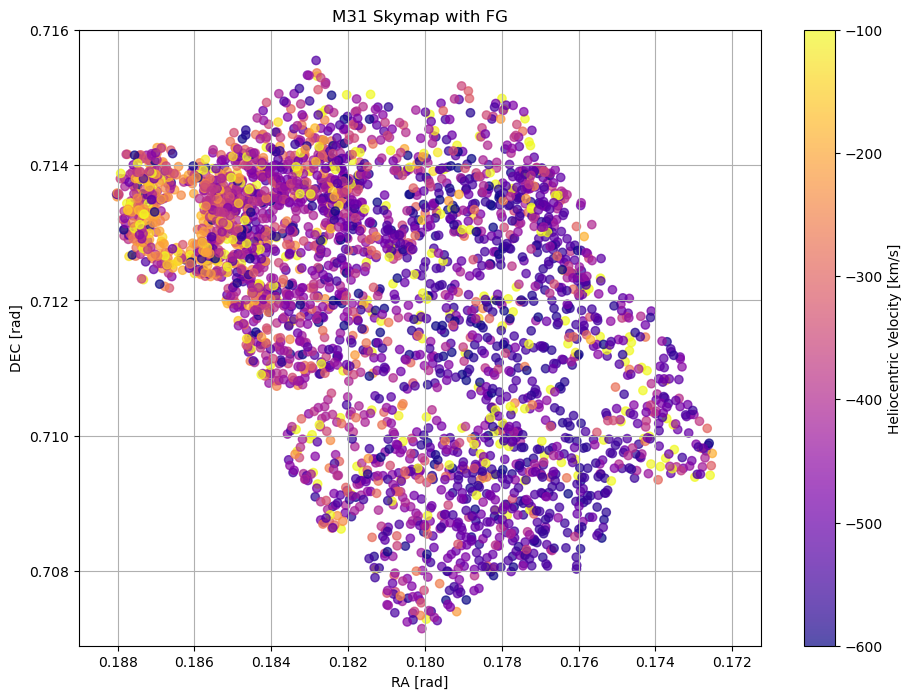

In [12]:
print(np.min(vhel))
print(np.max(vhel))
print(np.std(vhel))

plt.figure(figsize=(11,8))
#plt.axes(aspect='equal')
plt.scatter(ra_rad_fg, dec_rad_fg, alpha= 0.7, c=vhel_fg, cmap='plasma', vmin= -600, vmax=-100)
cbar = plt.colorbar()
cbar.set_label('Heliocentric Velocity [km/s]')
plt.grid()
plt.xlabel("RA [rad]")
plt.ylabel("DEC [rad]")
plt.title("M31 Skymap with FG")

plt.xlim(0.189, 0.17125)
plt.ylim(0.7069, 0.716)




(0.7069, 0.716)

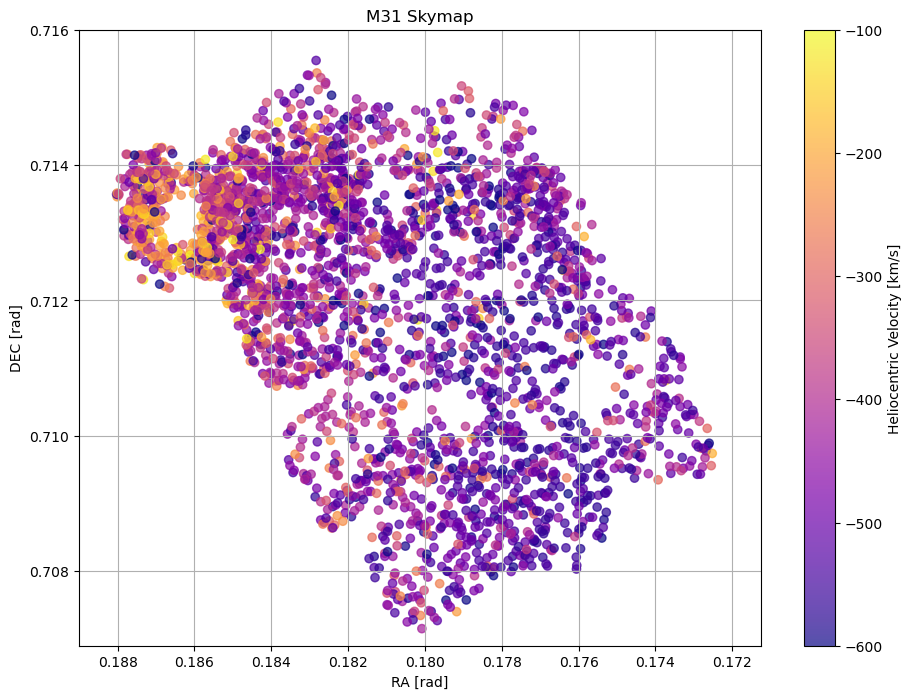

In [13]:

plt.figure(figsize=(11,8))
#plt.axes(aspect='equal')
plt.scatter(ra_rad, dec_rad, alpha= 0.7, c=vhel, cmap='plasma', vmin= -600, vmax=-100)
cbar = plt.colorbar()
cbar.set_label('Heliocentric Velocity [km/s]')
plt.grid()
plt.xlabel("RA [rad]")
plt.ylabel("DEC [rad]")
plt.title("M31 Skymap")

plt.xlim(0.189, 0.17125)
plt.ylim(0.7069, 0.716)

In [14]:
len(ra_rad)

2900

In [15]:
def get_dispersion(index, radius, std=False):
    ra_code = ra_rad[index]
    dec_code = dec_rad[index]
    vel_code = vhel[index]
    verr_code = vhel_err[index]

    v_dis = []
    ra_dis = []
    dec_dis = []
    for i in range(len(ra_code)):
        Xc = ra_code[i]
        Yc = dec_code[i]
        r = (np.sin(Yc) * np.sin(dec_code) + np.cos(Yc) * np.cos(dec_code) * np.cos(np.abs(Xc - ra_code)))#distance of all points to (x and y)
        ang = np.arccos(r)
        
        in_circle = np.where(ang < radius)[0]
        if len(in_circle) > 15:
            weights = 1/(verr_code[in_circle])
                
            xbar = np.average(vel_code[in_circle], weights = weights)

            numerator = np.sum(weights*(vel_code[in_circle] - xbar)**2)
            denominator = (len(in_circle)-1)/len(in_circle)*np.sum(weights)
                
            dispersion = np.sqrt(numerator/denominator)
            #vhel [stars_in_circle] the velocity of stars in my circle.
            v_dis.append(dispersion)
            ra_dis.append(Xc)
            dec_dis.append(Yc)
            
            
    return np.asarray(ra_dis), np.asarray(dec_dis), np.asarray(v_dis)

In [16]:

all_stars = list(range(0, len(ra_rad)))

print(len(all_stars))

ra_all, dec_all, vel_disp_all = get_dispersion(all_stars, 200*4.84814e-6)

print(len(ra_all))



2900
2900


/var/folders/rf/qb1kdfd52kdgjzt3dzgyx_lw0000gn/T/ipykernel_28255/3406406678.py:14: RuntimeWarning: invalid value encountered in arccos
  ang = np.arccos(r)


In [17]:
star_dist = []

for i in range(len(ra_all)):
    
    centerX = M31_rarad_center
    centerY = M31_decrad_center
    
    #centerX = 0.18635
    #centerY = 0.7132
    
    delta_dist = (np.sin(centerY))*(np.sin(dec_all))+(np.cos(centerY))*(np.cos(dec_all))*(np.cos(np.abs(centerX-ra_all)))
    dist = np.arccos(delta_dist)
    
    star_dist.append(dist[i])
    #print(dist)

print(len(star_dist))
print("min:", np.min(star_dist))
print("max:", np.max(star_dist))

star_dist= np.asarray(star_dist)

print()
print(len(ra_all))


2900
min: 0.00548095
max: 0.015022231

2900


0.015022231
0.00548095


(0.00500388618092984, 0.015499295317567885)

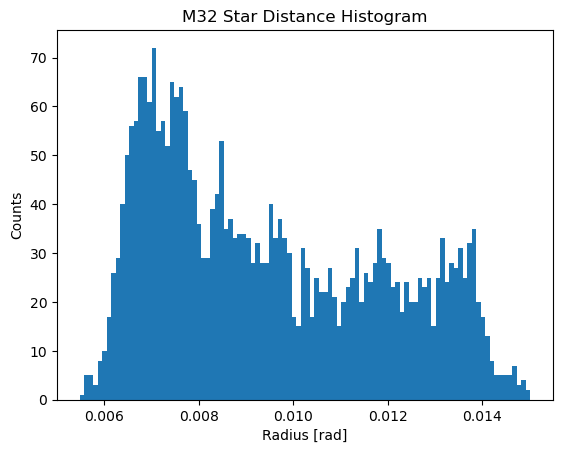

In [18]:
star_dist_hist = plt.hist(star_dist, bins=100)#, range=(0.006001,0.01399999))
plt.title('M32 Star Distance Histogram')
plt.xlabel("Radius [rad]")
plt.ylabel("Counts")

print(np.max(star_dist))
print(np.min(star_dist))
plt.xlim()

In [19]:
rings = np.zeros(40)
print(rings)

rings_distance = np.zeros(40)

#increment = 0.0002875
start = 0.0062
increment = 0.000345

#all_stars = list(range(0, len(ra_rad_M32)))

#ra_all, dec_all, vel_disp_all = get_dispersion(all_stars, 200*4.8481e-6)

ring0 = []
ring1 = []
ring2 = []
ring3 = []
ring4 = []
ring5 = []
ring6 = []
ring7 = []
ring8 = []
ring9 = []
ring10 = []
ring11 = []
ring12 = []
ring13 = []
ring14 = []
ring15 = []
ring16 = []
ring17 = []
ring18 = []
ring19 = []
ring20 = []
ring21 = []
ring22 = []
ring23 = []
ring24 = []
ring25 = []
ring26 = []
ring27 = []
ring28 = []
ring29 = []
ring30 = []
ring31 = []
ring32 = []
ring33 = []
ring34 = []
ring35 = []
ring36 = []
ring37 = []
ring38 = []
ring39 = []



def put_in_ring(index_number, ring_number, ring_name):
    if index_number == ring_number:
        ring_name.append(in_ring)


for x in range(40):
    in_ring = np.where((start+(increment*(x)) < star_dist) & (star_dist < start+(increment*(x+1))))[0]
    print(in_ring)
    
    #Number of rings and end point thing and increment stuff, it is like the end point added to the initial thing, which is why it is seen as extending so far out and has the nans for the last rings
    #should be changed
    
    rings[x] = np.nanmean(np.asarray(vel_disp_all)[in_ring])
    rings_distance[x] = (start+(increment*(x)) + (start+(increment*(x+1)))/2)
    #print(x)
    put_in_ring(x, 0, ring0)
    put_in_ring(x, 1, ring1)
    put_in_ring(x, 2, ring2)
    put_in_ring(x, 3, ring3)
    put_in_ring(x, 4, ring4)
    put_in_ring(x, 5, ring5)
    put_in_ring(x, 6, ring6)
    put_in_ring(x, 7, ring7)
    put_in_ring(x, 8, ring8)
    put_in_ring(x, 9, ring9)
    put_in_ring(x, 10, ring10)
    put_in_ring(x, 11, ring11)
    put_in_ring(x, 12, ring12)
    put_in_ring(x, 13, ring13)
    put_in_ring(x, 14, ring14)
    put_in_ring(x, 15, ring15)
    put_in_ring(x, 16, ring16)
    put_in_ring(x, 17, ring17)
    put_in_ring(x, 18, ring18)
    put_in_ring(x, 19, ring19)
    put_in_ring(x, 20, ring20)
    put_in_ring(x, 21, ring21)
    put_in_ring(x, 22, ring22)
    put_in_ring(x, 23, ring23)
    put_in_ring(x, 24, ring24)
    put_in_ring(x, 25, ring25)
    put_in_ring(x, 26, ring26)
    put_in_ring(x, 27, ring27)
    put_in_ring(x, 28, ring28)
    put_in_ring(x, 29, ring29)
    put_in_ring(x, 30, ring30)
    put_in_ring(x, 31, ring31)
    put_in_ring(x, 32, ring32)
    put_in_ring(x, 33, ring33)
    put_in_ring(x, 34, ring34)
    put_in_ring(x, 35, ring35)
    put_in_ring(x, 36, ring36)
    put_in_ring(x, 37, ring37)
    put_in_ring(x, 38, ring38)
    put_in_ring(x, 39, ring39)

#37 numbers

to_delete = [0]
rings = np.delete(rings, to_delete)
rings_distance = np.delete(rings_distance, to_delete)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[  17   18   19   87   89   90   97   98   99  100  101  102  104  105
  106  107  108  109  110  111  113  118  141  142  143  144  145  146
  148  151  226  228  234  235  238  240  241  243  246  248  249  250
  251  253  254  255  256  257  258  259  260  261  263  264  290  298
  299  339  343  350  352  353  354  356  357  358  360  361  362  364
  378  380  381  383  384  386  409  412  414  505  508  509  510  511
  515  516  517  623  625  642  740  741  742  743  744  745  746  747
  748  749  750  751  752  867  868  869  870  871  872  873  874  875
  876  877  890  891  982  983  984  985  986  987  988  990 1115 1116
 1117 1118 1119 1120 1121 1122 1133 1534 1535 1560 1564 1565 1567 1569
 1592 1595 1598]
[  14   15   16   62   64   65   66   67   70   71   72   73   74   75
   77   78   79   80   82   83   84   85   86   88   91   92   93   94
   95   

/var/folders/rf/qb1kdfd52kdgjzt3dzgyx_lw0000gn/T/ipykernel_28255/3421986552.py:69: RuntimeWarning: Mean of empty slice
  rings[x] = np.nanmean(np.asarray(vel_disp_all)[in_ring])


In [20]:
rings

array([102.46031058, 103.65230659, 104.50495359, 107.7149404 ,
       103.91525622,  91.8175129 ,  86.56381695,  86.71773411,
        82.25506757,  78.43163414,  81.10892021,  78.25724688,
        69.90117884,  70.44471781,  70.88073878,  73.64336261,
        73.26132551,  74.43736787,  67.92344054,  68.15986959,
        67.39775435,  63.4651273 ,  58.71466725,  60.35135114,
        63.50612975,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan])

39
39
7.692555907652258
22.84104600938692


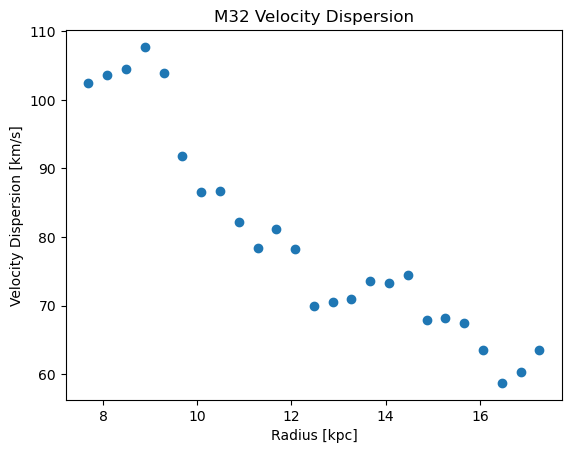

In [21]:
rings_distance_kpc = np.tan(rings_distance) * 770

print(len(rings_distance_kpc))

print(len(rings))

plt.scatter(rings_distance_kpc, rings)
plt.title("M32 Velocity Dispersion")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity Dispersion [km/s]")


print(np.min(rings_distance_kpc))
print(np.max(rings_distance_kpc))

#plt.ylim(60, 150)

In [22]:
vhel_fg_serendip = np.concatenate((vhel_fg, serendip_vel))

Text(0, 0.5, 'Counts')

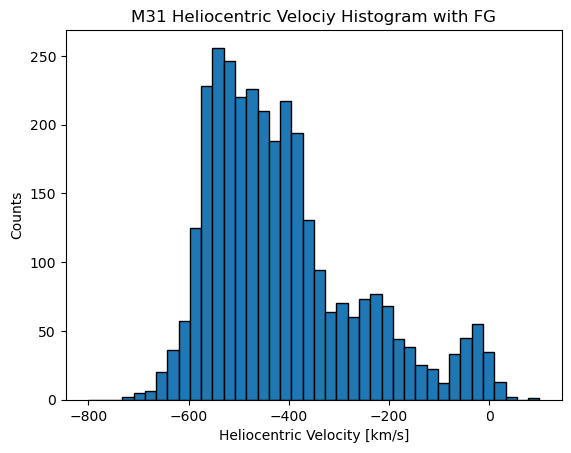

In [23]:
histogram = plt.hist(vhel_fg_serendip, bins=40, ec='k', range=(-800,100))
plt.title('M31 Heliocentric Velociy Histogram with FG')
plt.xlabel('Heliocentric Velocity [km/s]')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

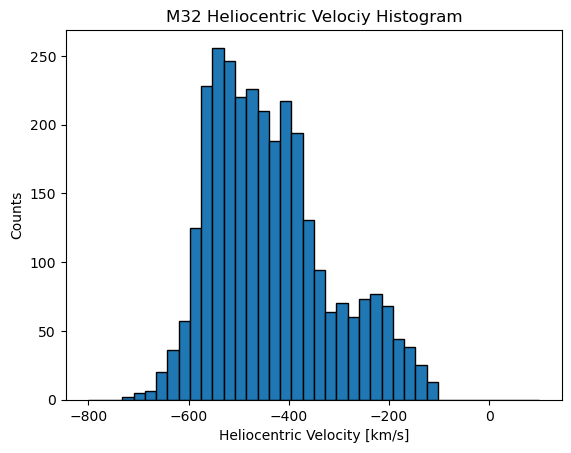

In [24]:
histogram = plt.hist(vhel_serendip, bins=40, ec='k', range=(-800,100))
plt.title('M32 Heliocentric Velociy Histogram')
plt.xlabel('Heliocentric Velocity [km/s]')
plt.ylabel('Counts')

In [25]:
print(histogram[0])
print(histogram[1])

[  0.   0.   0.   2.   5.   6.  20.  36.  57. 125. 228. 256. 246. 220.
 226. 210. 188. 217. 194. 131.  94.  64.  70.  60.  73.  77.  68.  44.
  38.  25.  13.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
[-800.  -777.5 -755.  -732.5 -710.  -687.5 -665.  -642.5 -620.  -597.5
 -575.  -552.5 -530.  -507.5 -485.  -462.5 -440.  -417.5 -395.  -372.5
 -350.  -327.5 -305.  -282.5 -260.  -237.5 -215.  -192.5 -170.  -147.5
 -125.  -102.5  -80.   -57.5  -35.   -12.5   10.    32.5   55.    77.5
  100. ]


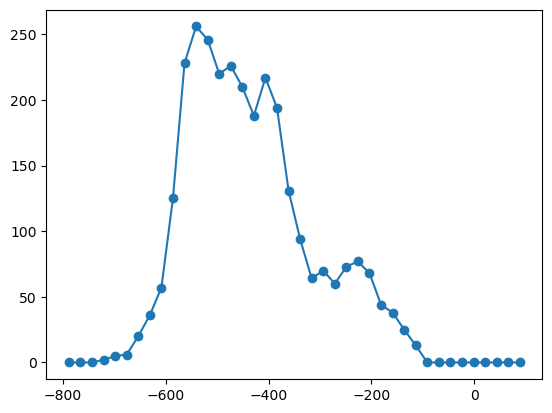

In [26]:
bins = histogram[1]
y_values = histogram[0]
x_values = np.asarray([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

plt.plot(x_values, y_values, '-o')

In [27]:
len(star_dist)

2900

In [28]:

def gaussian(x, mu, sigma):
    return np.exp(-np.power(x-mu, 2.) / (2 * np.power(sigma, 2.)))


def f(x, mid1, dev1, amp1, mid2, dev2, amp2):#, mid3, dev3, amp3):
    #mid, deviation, amplitude
    gauss1 = gaussian(x, mid1, dev1)
    gauss2 = gaussian(x, mid2, dev2)
    #gauss3 = gaussian(x, mid3, dev3)
    
    return amp1*gauss1 + amp2*gauss2


In [29]:
from scipy.optimize import curve_fit

popt_vhel, pocv_vhel = curve_fit(f, xdata=x_values, ydata=y_values, p0=[-500, 100, 225, -190, 80, 60])#, -40, 40, 15])

print(popt_vhel)


[-503.5791778    76.35675162  214.81741634 -341.5481172   125.02959539
   88.52158423]


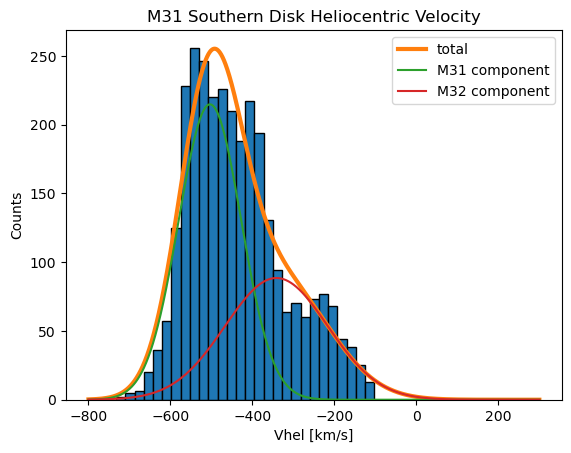

In [30]:
xtest = np.linspace(-800, 300, 2000)
ytest = f(xtest, popt_vhel[0], popt_vhel[1], popt_vhel[2], popt_vhel[3], popt_vhel[4], popt_vhel[5])#, popt_vhel[6], popt_vhel[7], popt_vhel[8])

gauss1 = popt_vhel[2]*gaussian(xtest, popt_vhel[0], popt_vhel[1])
gauss2 = popt_vhel[5]*gaussian(xtest, popt_vhel[3], popt_vhel[4])


histogram = plt.hist(vhel_serendip, bins=40, ec='k', range=(-800,100))

plt.plot(xtest, ytest, lw=3, label='total')
plt.plot(xtest, gauss1, label='M31 component')
plt.plot(xtest, gauss2, label='M32 component')

plt.xlabel('Vhel [km/s]')
plt.ylabel('Counts')
plt.title('M31 Southern Disk Heliocentric Velocity')
plt.legend()

In [31]:
rings[0]

102.46031057980764

[array([  17,   18,   19,   87,   89,   90,   97,   98,   99,  100,  101,
        102,  104,  105,  106,  107,  108,  109,  110,  111,  113,  118,
        141,  142,  143,  144,  145,  146,  148,  151,  226,  228,  234,
        235,  238,  240,  241,  243,  246,  248,  249,  250,  251,  253,
        254,  255,  256,  257,  258,  259,  260,  261,  263,  264,  290,
        298,  299,  339,  343,  350,  352,  353,  354,  356,  357,  358,
        360,  361,  362,  364,  378,  380,  381,  383,  384,  386,  409,
        412,  414,  505,  508,  509,  510,  511,  515,  516,  517,  623,
        625,  642,  740,  741,  742,  743,  744,  745,  746,  747,  748,
        749,  750,  751,  752,  867,  868,  869,  870,  871,  872,  873,
        874,  875,  876,  877,  890,  891,  982,  983,  984,  985,  986,
        987,  988,  990, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1133, 1534, 1535, 1560, 1564, 1565, 1567, 1569, 1592, 1595, 1598])]
[array([  12,   13,   56,   57,   58,   59,   60

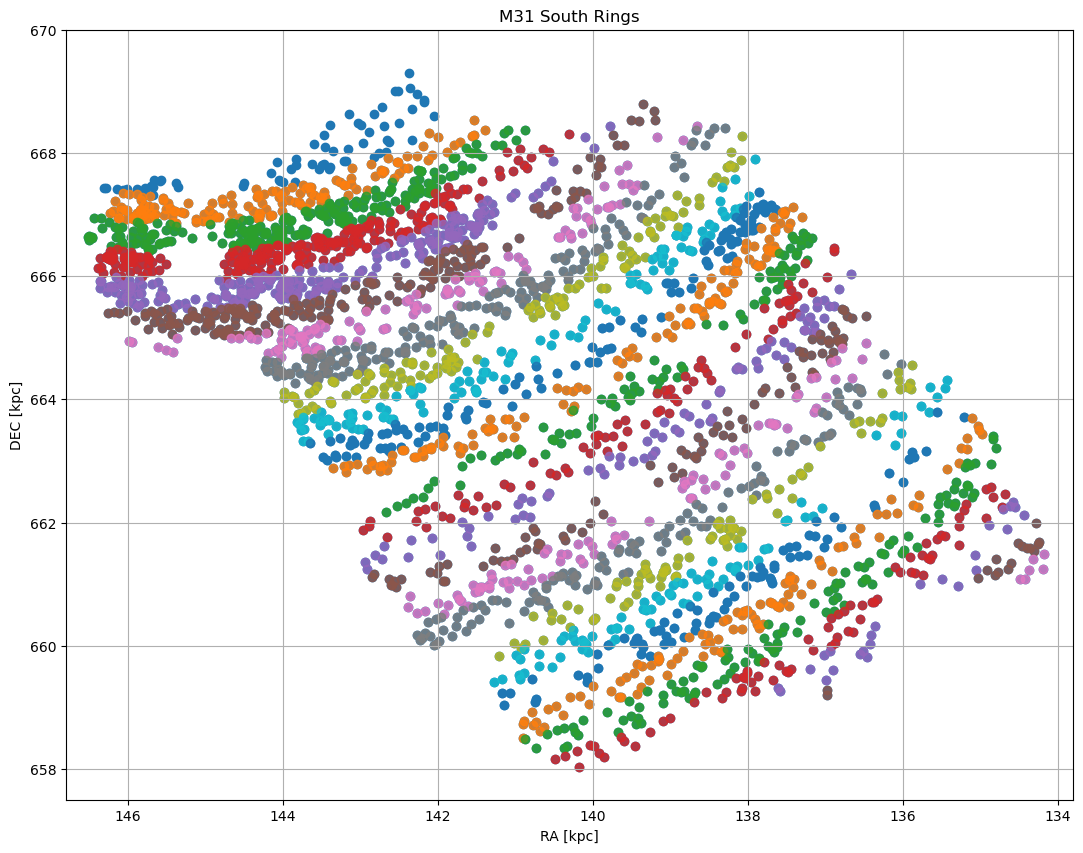

In [32]:
#converting ra and dec to kpc
ra_kpc = np.tan(ra_rad)*770
dec_kpc = np.tan(dec_rad)*770

plt.figure(figsize=(13,10))
#plt.axes(aspect='equal')
plt.scatter(ra_kpc, dec_kpc)#, c=vhel, cmap='plasma', vmin= -600, vmax=0)
plt.grid()
plt.xlabel("RA [kpc]")
plt.ylabel("DEC [kpc]")
plt.title("M31 South Rings")




plt.xlim(146.8, 133.8)


plt.ylim(657.5,670)
#plt.ylim(0.7069, 0.716)

plt.scatter(ra_kpc[ring0], dec_kpc[ring0], alpha=0.8)
plt.scatter(ra_kpc[ring1], dec_kpc[ring1], alpha=0.8)#c='red', )#, alpha= 0.7)#, c=vhel, cmap='plasma', vmin= -600, vmax=0)
plt.scatter(ra_kpc[ring2], dec_kpc[ring2], alpha=0.8)
plt.scatter(ra_kpc[ring3], dec_kpc[ring3], alpha=0.8)
plt.scatter(ra_kpc[ring4], dec_kpc[ring4], alpha=0.8)
plt.scatter(ra_kpc[ring5], dec_kpc[ring5], alpha=0.8)
plt.scatter(ra_kpc[ring6], dec_kpc[ring6], alpha=0.8)
plt.scatter(ra_kpc[ring7], dec_kpc[ring7], alpha=0.8)
plt.scatter(ra_kpc[ring8], dec_kpc[ring8], alpha=0.8)
plt.scatter(ra_kpc[ring9], dec_kpc[ring9], alpha=0.8)
plt.scatter(ra_kpc[ring10], dec_kpc[ring10], alpha=0.8)
plt.scatter(ra_kpc[ring11], dec_kpc[ring11], alpha=0.8)
plt.scatter(ra_kpc[ring12], dec_kpc[ring12], alpha=0.8)
plt.scatter(ra_kpc[ring13], dec_kpc[ring13], alpha=0.8)
plt.scatter(ra_kpc[ring14], dec_kpc[ring14], alpha=0.8)
plt.scatter(ra_kpc[ring15], dec_kpc[ring15], alpha=0.8)
plt.scatter(ra_kpc[ring16], dec_kpc[ring16], alpha=0.8)
plt.scatter(ra_kpc[ring17], dec_kpc[ring17], alpha=0.8)
plt.scatter(ra_kpc[ring18], dec_kpc[ring18], alpha=0.8)
plt.scatter(ra_kpc[ring19], dec_kpc[ring19], alpha=0.8)
plt.scatter(ra_kpc[ring20], dec_kpc[ring20], alpha=0.8)
plt.scatter(ra_kpc[ring21], dec_kpc[ring21], alpha=0.8)
plt.scatter(ra_kpc[ring22], dec_kpc[ring22], alpha=0.8)
plt.scatter(ra_kpc[ring23], dec_kpc[ring23], alpha=0.8)
plt.scatter(ra_kpc[ring24], dec_kpc[ring24], alpha=0.8)
plt.scatter(ra_kpc[ring25], dec_kpc[ring25], alpha=0.8)
plt.scatter(ra_kpc[ring26], dec_kpc[ring26], alpha=0.8)
plt.scatter(ra_kpc[ring27], dec_kpc[ring27], alpha=0.8)
plt.scatter(ra_kpc[ring28], dec_kpc[ring28], alpha=0.8)
plt.scatter(ra_kpc[ring29], dec_kpc[ring29], alpha=0.8)
plt.scatter(ra_kpc[ring30], dec_kpc[ring30], alpha=0.8)
plt.scatter(ra_kpc[ring31], dec_kpc[ring31], alpha=0.8)
plt.scatter(ra_kpc[ring32], dec_kpc[ring32], alpha=0.8)
plt.scatter(ra_kpc[ring33], dec_kpc[ring33], alpha=0.8)
plt.scatter(ra_kpc[ring34], dec_kpc[ring34], alpha=0.8)
plt.scatter(ra_kpc[ring35], dec_kpc[ring35], alpha=0.8)
plt.scatter(ra_kpc[ring36], dec_kpc[ring36], alpha=0.8)
plt.scatter(ra_kpc[ring37], dec_kpc[ring37], alpha=0.8)
#plt.scatter(ra_kpc[ring38], dec_kpc[ring38], alpha=0.8)
#plt.scatter(ra_kpc[ring39], dec_kpc[ring39], alpha=0.8)

#

print(ring0)
print(ring2)
print(ring3)
#plt.scatter(ra_kpc)



Text(24.847222222222214, 0.5, 'DEC [rad]')

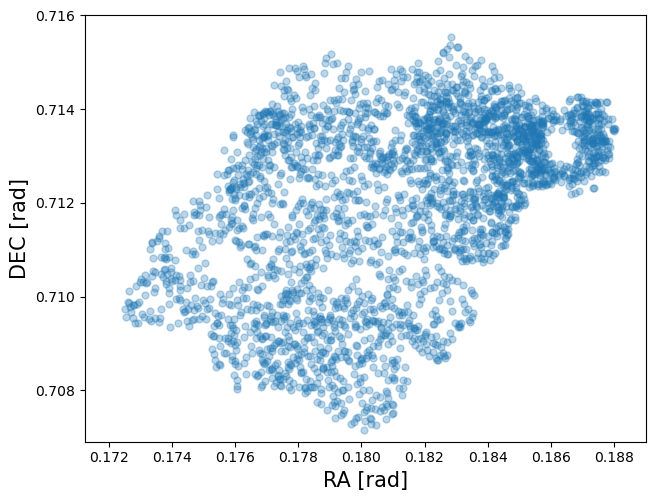

In [33]:
plt.plot(ra_rad, dec_rad, 'o', markersize=5, alpha=0.3)
plt.tight_layout()
plt.xlim(0.17125, 0.189)
plt.ylim(0.7069, 0.716)
plt.xlabel("RA [rad]", fontsize=15)
plt.ylabel("DEC [rad]", fontsize=15)

Text(0, 0.5, 'Velocity Dispersion [km/s]')

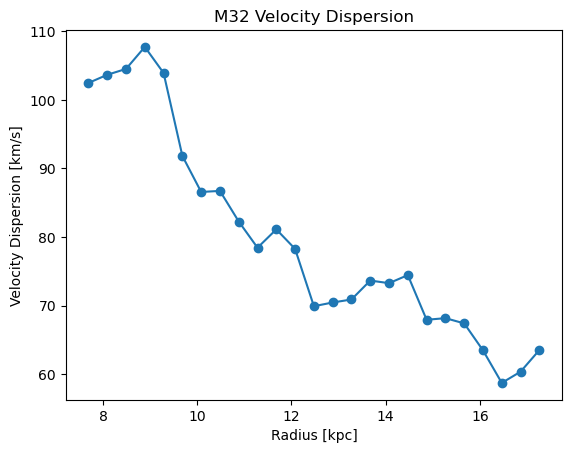

In [34]:
dispersion_x_values = rings_distance_kpc
dispersion_y_values = rings

plt.plot(dispersion_x_values, dispersion_y_values, '-o')
plt.title("M32 Velocity Dispersion")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity Dispersion [km/s]")



In [35]:
rings_north = np.load("M31_North_Rings.npy")

rings_distance_kpc_north = np.load("M31_North_Rings_distance.npy")

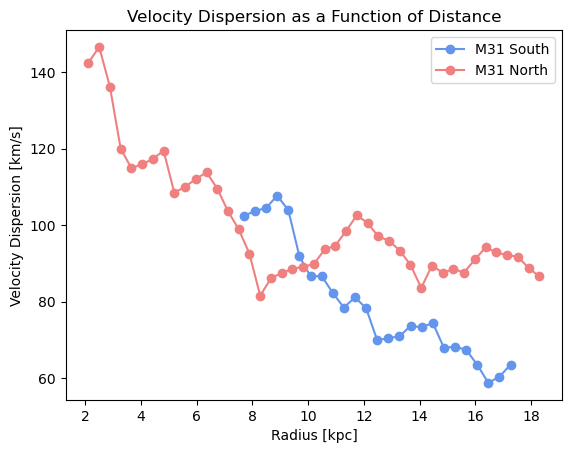

In [36]:
#combined
plt.plot(dispersion_x_values, dispersion_y_values, '-o', label="M31 South", c='cornflowerblue')
plt.plot(rings_distance_kpc_north, rings_north, '-o', c='lightcoral', label='M31 North')
plt.title("Velocity Dispersion as a Function of Distance")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity Dispersion [km/s]")
plt.legend()


Text(0, 0.5, 'F814W [mag]')

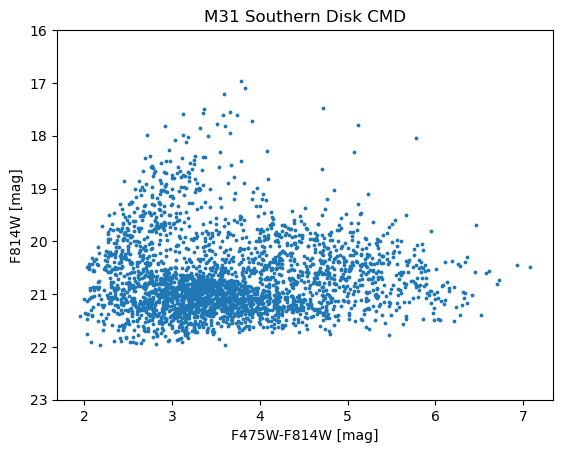

In [37]:
plt.scatter(f475w-f814w, f814w, s=3)
plt.ylim(23,16)
plt.title("M31 Southern Disk CMD")
plt.xlabel("F475W-F814W [mag]")
plt.ylabel("F814W [mag]")

Text(0, 0.5, 'F814W [mag]')

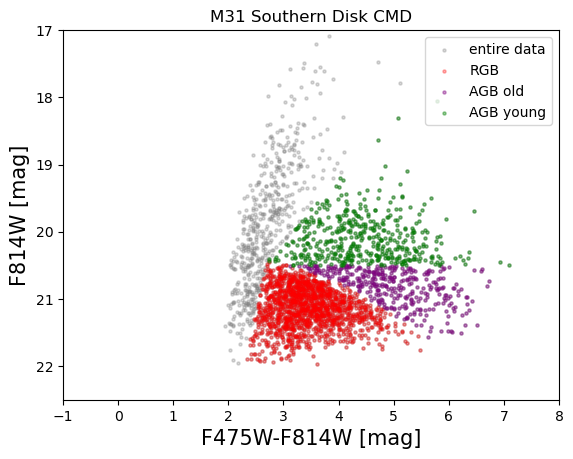

In [38]:

line = -2.6/0.7 * (f475w-f814w) + 30.42857142857143

a = 0.1
h = 2.1
k = 20.4
hyperbola = a*(f475w-f814w - h)**2. + k

#old MS selection: MS = np.where((f475w-f814w <=1) & (f475w -f814w >=-1))[0]

#MS = np.where(((f814w <=line) & (f475w -f814w >=-1)))[0]

line2 = (-2.5/0.7) * ((f475w-f814w)-2.307) + 21.2

#plt.plot(f475w-f814w, line2, c='purple')

#MS = np.where((f475w-f814w < 2.7) & (f814w<line2)
#)[0]

#f475w_MS = f475w[MS]
#f814w_MS = f814w[MS]

RGB = np.where((f814w > line) & (f814w > hyperbola))[0]

f475w_RGB = f475w[RGB]
f814w_RGB = f814w[RGB]

AGB_old = np.where((f814w < hyperbola) & (f814w > 20.5) & (f475w-f814w > 2.7))[0]

f475w_AGB_old = f475w[AGB_old]
f814w_AGB_old = f814w[AGB_old]

AGB_young = np.where((f814w < hyperbola) & (f814w > (-(f475w-f814w)+23.15)) & (f814w<20.5)& (f475w-f814w > 2.7))[0]

f475w_AGB_young = f475w[AGB_young]
f814w_AGB_young = f814w[AGB_young]


plt.scatter(f475w-f814w, f814w, s=5, alpha=0.3, c='gray', label='entire data')

#plt.scatter(f475w_MS-f814w_MS, f814w_MS, s=5, alpha=0.3, label='MS', c='blue')

plt.scatter(f475w_RGB-f814w_RGB, f814w_RGB, s=5, alpha=0.3, label='RGB', c='red')

plt.scatter(f475w_AGB_old-f814w_AGB_old, f814w_AGB_old, s=5, alpha=0.4, label='AGB old', c='purple')

plt.scatter(f475w_AGB_young-f814w_AGB_young, f814w_AGB_young, s=5, alpha=0.4, label='AGB young', c='green')

plt.legend(loc='upper right')
plt.title("M31 Northern Disk CMD divided into age bins", fontsize = 15)
plt.xlabel("f475w-f814w [mag]", fontsize=15)
plt.ylabel("f814w", fontsize=15)


plt.xlim(-1,8)
plt.ylim(22.5,17)
plt.title("M31 Southern Disk CMD")
plt.xlabel("F475W-F814W [mag]")
plt.ylabel("F814W [mag]")


In [39]:
len(ra_rad[AGB_young])

449

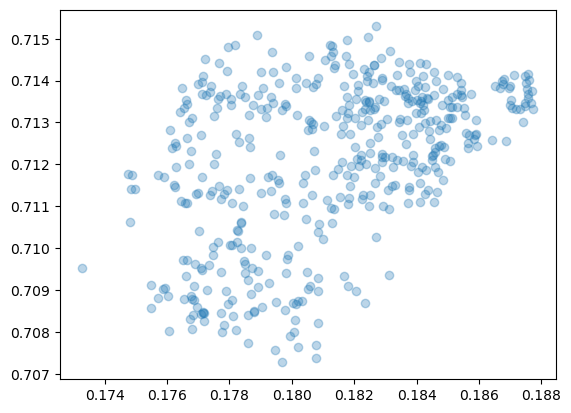

In [40]:
plt.scatter(ra_rad[AGB_young], dec_rad[AGB_young], alpha=0.3)

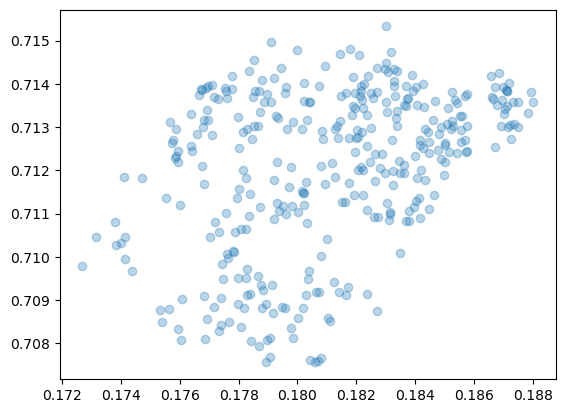

In [41]:
plt.scatter(ra_rad[AGB_old], dec_rad[AGB_old], alpha=0.3)

Text(0.5, 1.0, 'M31 Southern Disk RGB Heliocentric Velocity')

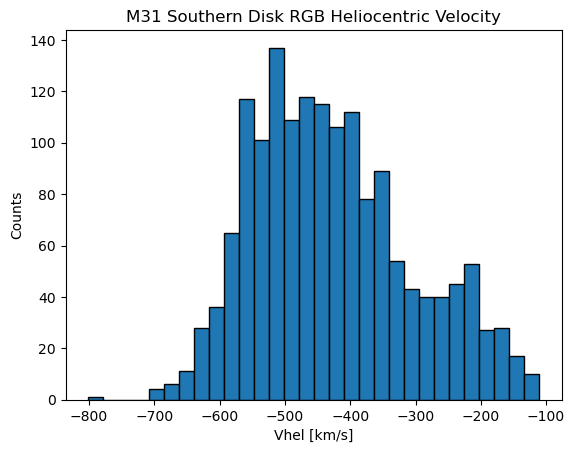

In [42]:
RGB_vhel = plt.hist(vhel[RGB], bins=30, ec='k')

plt.xlabel('Vhel [km/s]')
plt.ylabel('Counts')
plt.title('M31 Southern Disk RGB Heliocentric Velocity')

Text(0.5, 1.0, 'M31 Southern Disk Old AGB Heliocentric Velocity')

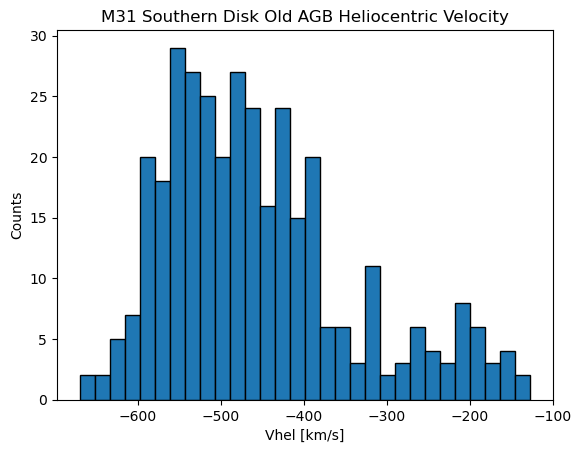

In [43]:
AGB_old_vhel = plt.hist(vhel[AGB_old], bins=30, ec='k')
plt.xlabel('Vhel [km/s]')
plt.ylabel('Counts')
plt.title('M31 Southern Disk Old AGB Heliocentric Velocity')

Text(0.5, 1.0, 'M31 Southern Disk Young AGB Heliocentric Velocity')

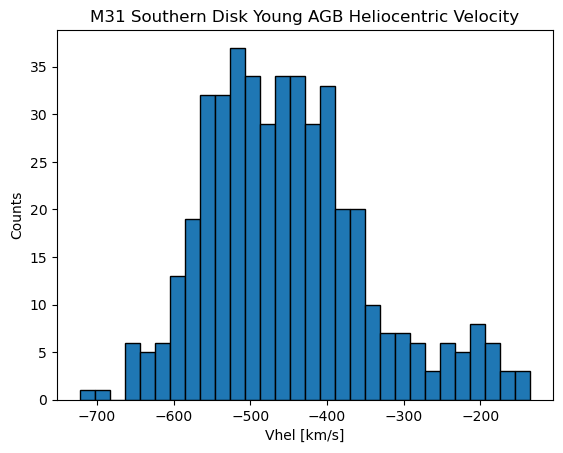

In [44]:
AGB_young_vhel = plt.hist(vhel[AGB_young], bins=30, ec='k')
plt.xlabel('Vhel [km/s]')
plt.ylabel('Counts')
plt.title('M31 Southern Disk Young AGB Heliocentric Velocity')

In [45]:
print(len(vel_disp_all))
print(len(vhel))

2900
2900


In [46]:
#star_dist_MS = star_dist[MS]

star_dist_RGB = star_dist[RGB]

star_dist_AGB_old = star_dist[AGB_old]

star_dist_AGB_young = star_dist[AGB_young]

In [47]:
print(np.max(star_dist_RGB))

rings_RGB = np.zeros(30)


rings_distance_RGB = np.zeros(30)

increment_RGB = 0.0004

#all_stars = list(range(0, len(ra_rad_M32)))

#ra_all, dec_all, vel_disp_all = get_dispersion(all_stars, 200*4.8481e-6)



for x in range(30):
    in_ring_RGB = np.where((increment_RGB*(x) < star_dist_RGB) & (star_dist_RGB < increment_RGB*(x+1)))[0]

    rings_RGB[x] = np.nanmean(np.asarray(vel_disp_all)[in_ring_RGB])
    rings_distance_RGB[x] = (increment_RGB*(x) + increment_RGB*(x+1))/2

0.015022231


/var/folders/rf/qb1kdfd52kdgjzt3dzgyx_lw0000gn/T/ipykernel_28255/1284610720.py:19: RuntimeWarning: Mean of empty slice
  rings_RGB[x] = np.nanmean(np.asarray(vel_disp_all)[in_ring_RGB])


30
30


Text(0, 0.5, 'Velocity Dispersion [km/s]')

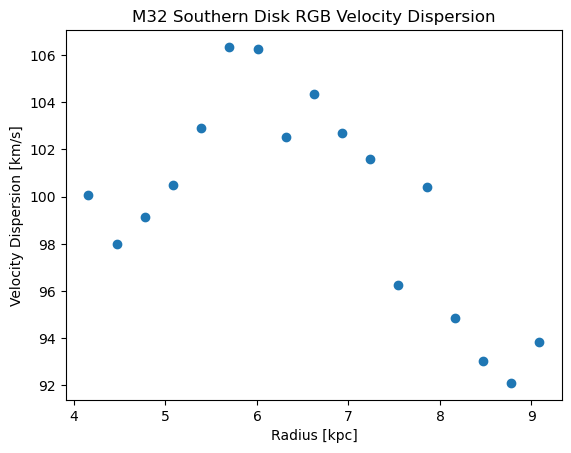

In [48]:
rings_distance_RGB_kpc = np.tan(rings_distance_RGB) * 770

print(len(rings_distance_RGB_kpc))
print(len(rings_RGB))

plt.scatter(rings_distance_RGB_kpc, rings_RGB)
plt.title("M32 Southern Disk RGB Velocity Dispersion")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity Dispersion [km/s]")

In [49]:
print(np.max(star_dist_AGB_old))

rings_AGB_old = np.zeros(30)


rings_distance_AGB_old = np.zeros(30)

increment_AGB_old = 0.0004

#all_stars = list(range(0, len(ra_rad_M32)))

#ra_all, dec_all, vel_disp_all = get_dispersion(all_stars, 200*4.8481e-6)



for x in range(30):
    in_ring_AGB_old = np.where((increment_AGB_old*(x) < star_dist_AGB_old) & (star_dist_AGB_old < increment_AGB_old*(x+1)))[0]
    rings_AGB_old[x] = np.nanmean(np.asarray(vel_disp_all)[in_ring_AGB_old])
    rings_distance_AGB_old[x] = (increment_AGB_old*(x) + increment_AGB_old*(x+1))/2

0.014794332


/var/folders/rf/qb1kdfd52kdgjzt3dzgyx_lw0000gn/T/ipykernel_28255/3848317562.py:18: RuntimeWarning: Mean of empty slice
  rings_AGB_old[x] = np.nanmean(np.asarray(vel_disp_all)[in_ring_AGB_old])


30
30


Text(0, 0.5, 'Velocity Dispersion [km/s]')

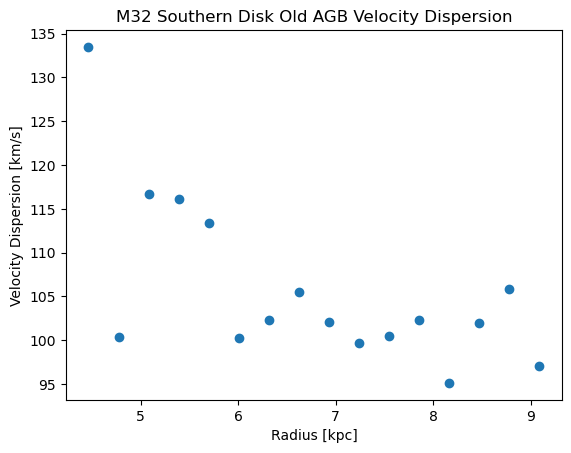

In [50]:
rings_distance_AGB_old_kpc = np.tan(rings_distance_AGB_old) * 770

print(len(rings_distance_AGB_old_kpc))
print(len(rings_AGB_old))

plt.scatter(rings_distance_AGB_old_kpc, rings_AGB_old)
plt.title("M32 Southern Disk Old AGB Velocity Dispersion")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity Dispersion [km/s]")

In [51]:
print(np.max(star_dist_AGB_young))

rings_AGB_young = np.zeros(30)


rings_distance_AGB_young = np.zeros(30)

increment_AGB_young = 0.0004

#all_stars = list(range(0, len(ra_rad_M32)))

#ra_all, dec_all, vel_disp_all = get_dispersion(all_stars, 200*4.8481e-6)



for x in range(30):
    in_ring_AGB_young = np.where((increment_AGB_young*(x) < star_dist_AGB_young) & (star_dist_AGB_young < increment_AGB_young*(x+1)))[0]
    rings_AGB_young[x] = np.nanmean(np.asarray(vel_disp_all)[in_ring_AGB_young])
    rings_distance_AGB_young[x] = (increment_AGB_young*(x) + increment_AGB_young*(x+1))/2

0.0146689


/var/folders/rf/qb1kdfd52kdgjzt3dzgyx_lw0000gn/T/ipykernel_28255/202806764.py:18: RuntimeWarning: Mean of empty slice
  rings_AGB_young[x] = np.nanmean(np.asarray(vel_disp_all)[in_ring_AGB_young])


30
30


Text(0, 0.5, 'Velocity Dispersion [km/s]')

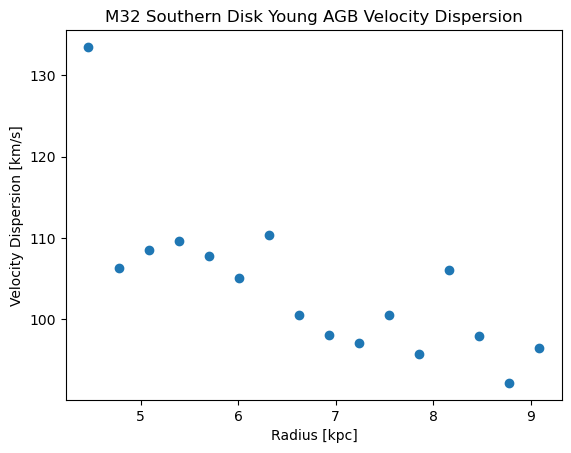

In [52]:
rings_distance_AGB_young_kpc = np.tan(rings_distance_AGB_young) * 770

print(len(rings_distance_AGB_young_kpc))
print(len(rings_AGB_young))

plt.scatter(rings_distance_AGB_young_kpc, rings_AGB_young)
plt.title("M32 Southern Disk Young AGB Velocity Dispersion")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity Dispersion [km/s]")

In [53]:
#ra_kpc = np.tan(ra_rad)*770
#dec_kpc = np.tan(dec_rad)*770

-800.8169097900391
-110.34104824066162


(147.126009, 133.559247)

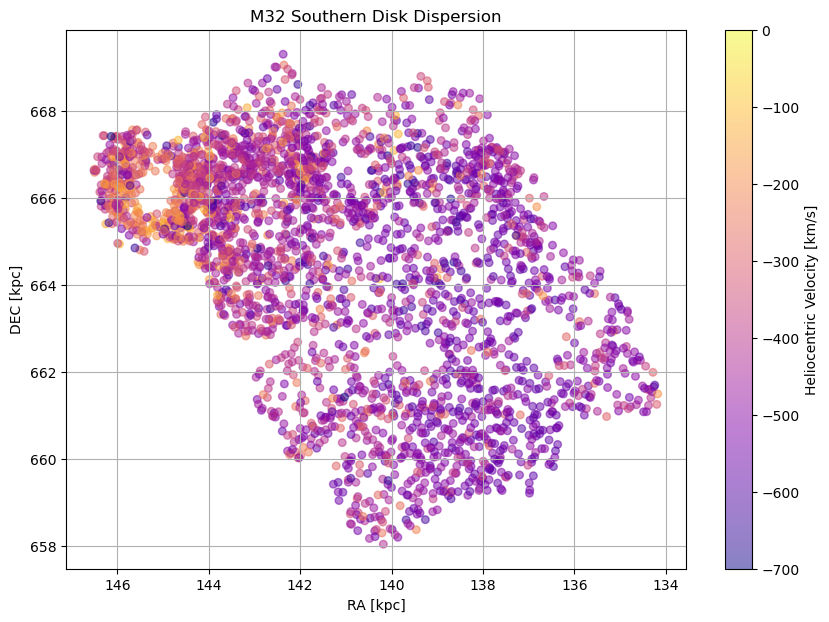

In [54]:
print(np.min(vhel))
print(np.max(vhel))

plt.figure(figsize=(10,7))
skymap = plt.scatter(ra_kpc, dec_kpc, s=30, c=vhel, cmap='plasma', alpha=0.5, vmin=-700, vmax=0)
cbar = plt.colorbar()
cbar.set_label('Heliocentric Velocity [km/s]')
plt.grid()
plt.xlabel("RA [kpc]")
plt.ylabel("DEC [kpc]")
plt.title("M32 Southern Disk Dispersion")

plt.ylim(657.470874, 669.8609)
plt.xlim(147.126009, 133.559247)

-800.8169097900391
-110.34104824066162


(147.126009, 133.559247)

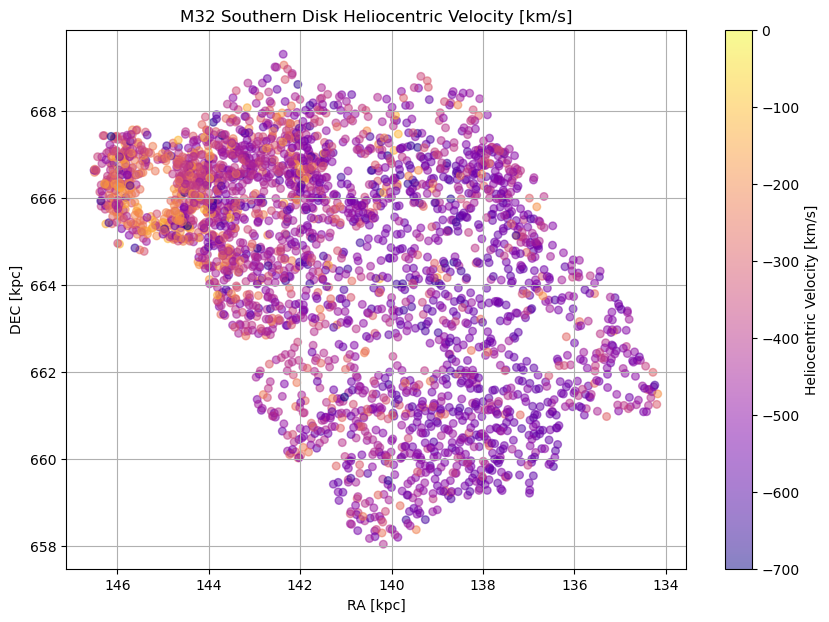

In [55]:
print(np.min(vhel))
print(np.max(vhel))

plt.figure(figsize=(10,7))
skymap = plt.scatter(ra_kpc, dec_kpc, s=30, c=vhel, cmap='plasma', alpha=0.5, vmin=-700, vmax=0)
cbar = plt.colorbar()
cbar.set_label('Heliocentric Velocity [km/s]')
plt.grid()
plt.xlabel("RA [kpc]")
plt.ylabel("DEC [kpc]")
plt.title("M32 Southern Disk Heliocentric Velocity [km/s]")
plt.ylim(657.470874, 669.8609)
plt.xlim(147.126009, 133.559247)

34.075039689586866
142.02749653301692


(147.126009, 133.559247)

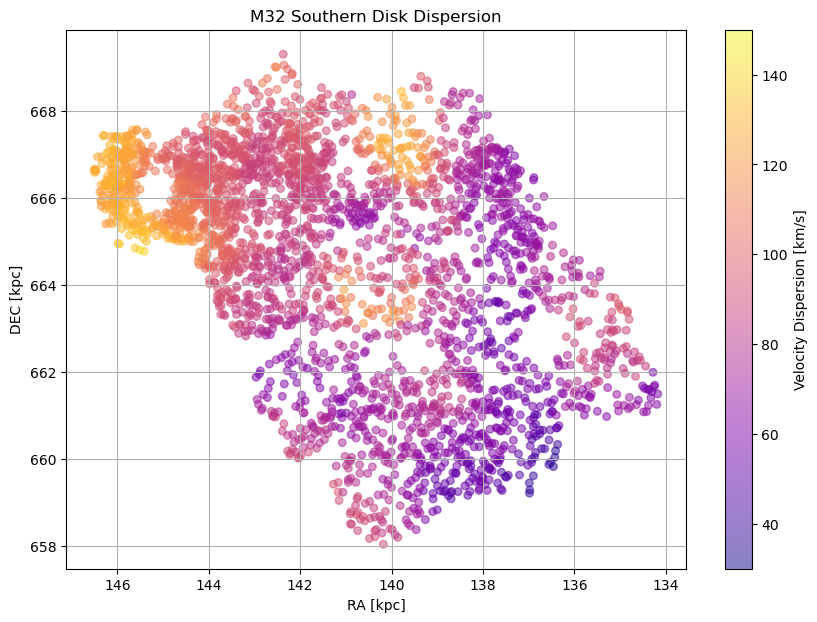

In [56]:
print(np.min(vel_disp_all))
print(np.max(vel_disp_all))

plt.figure(figsize=(10,7))
skymap = plt.scatter(ra_kpc, dec_kpc, s=30, c=vel_disp_all, cmap='plasma', alpha=0.5, vmin=30, vmax=150)
cbar = plt.colorbar()
cbar.set_label('Velocity Dispersion [km/s]')
plt.grid()
plt.xlabel("RA [kpc]")
plt.ylabel("DEC [kpc]")
plt.title("M32 Southern Disk Dispersion")

plt.ylim(657.470874, 669.8609)
plt.xlim(147.126009, 133.559247)


In [57]:
ra_kpc_south = ra_kpc
dec_kpc_south = dec_kpc
vel_disp_all_south = vel_disp_all

np.save


<function numpy.save(file, arr, allow_pickle=True, fix_imports=True)>

In [58]:
#ra_MS, dec_MS, vel_disp_MS = get_dispersion(MS, 200*4.8481e-6)

ra_RGB, dec_RGB, vel_disp_RGB = get_dispersion(RGB, 200*4.84814e-6)

ra_AGB_old, dec_AGB_old, vel_disp_AGB_old = get_dispersion(AGB_old, 275*4.84814e-6)

ra_AGB_young, dec_AGB_young, vel_disp_AGB_young = get_dispersion(AGB_young, 275*4.84814e-6)

/var/folders/rf/qb1kdfd52kdgjzt3dzgyx_lw0000gn/T/ipykernel_28255/3406406678.py:14: RuntimeWarning: invalid value encountered in arccos
  ang = np.arccos(r)


146.2574626468298
60.509328640480625


(147.126009, 133.559247)

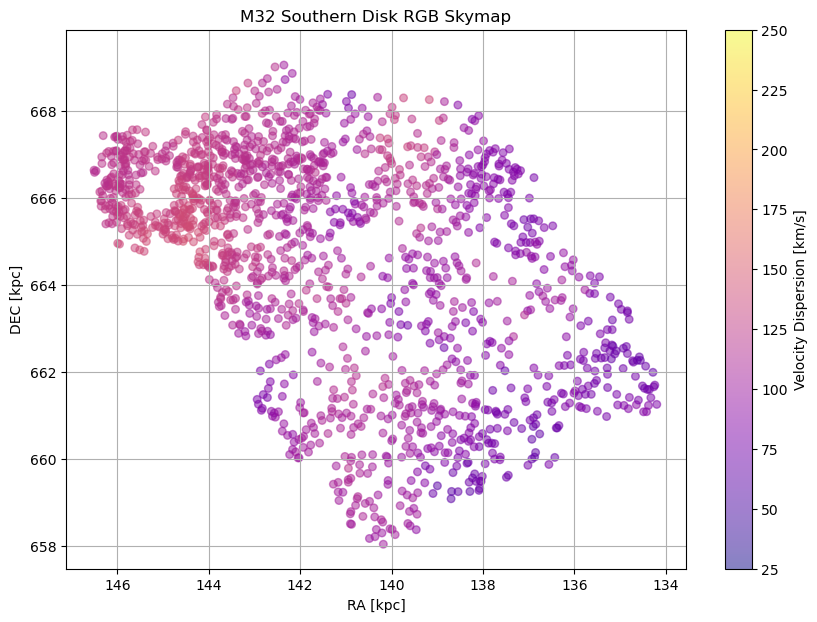

In [59]:
print(np.max(vel_disp_RGB))
print(np.min(vel_disp_RGB))


ra_kpc_RGB = np.tan(ra_RGB)*770
dec_kpc_RGB = np.tan(dec_RGB)*770

plt.figure(figsize=(10,7))
plt.scatter(ra_kpc_RGB, dec_kpc_RGB, s=30, c=vel_disp_RGB, cmap='plasma', alpha=0.5, vmin=25, vmax=250)
cbar = plt.colorbar()
cbar.set_label('Velocity Dispersion [km/s]')
plt.grid()
plt.xlabel("RA [kpc]")
plt.ylabel("DEC [kpc]")
plt.title("M32 Southern Disk RGB Skymap")

plt.ylim(657.470874, 669.8609)
plt.xlim(147.126009, 133.559247)


146.33825802692527
40.441868036912865


(147.126009, 133.559247)

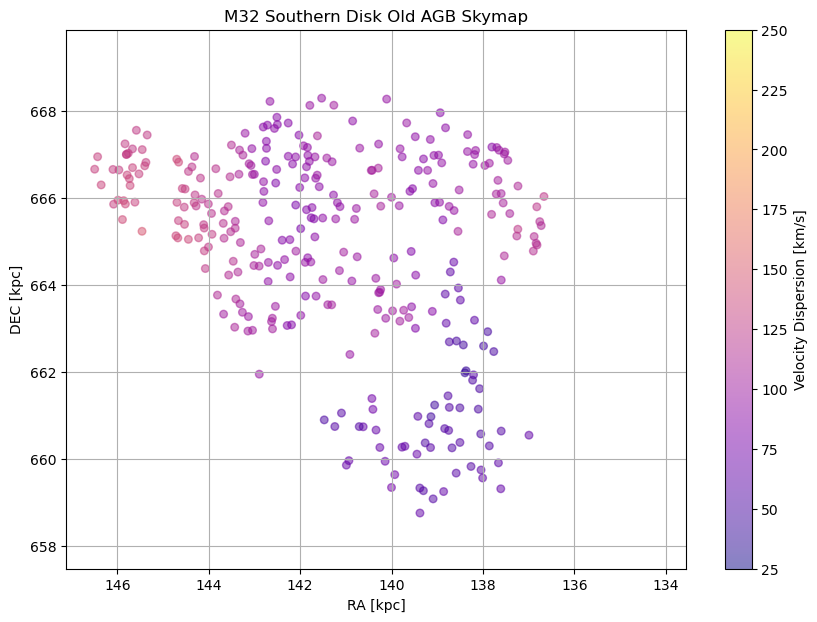

In [60]:
print(np.max(vel_disp_AGB_old))
print(np.min(vel_disp_AGB_old))

ra_kpc_AGB_old = np.tan(ra_AGB_old)*770
dec_kpc_AGB_old = np.tan(dec_AGB_old)*770

plt.figure(figsize=(10,7))
plt.scatter(ra_kpc_AGB_old, dec_kpc_AGB_old, s=30, c=vel_disp_AGB_old, cmap='plasma', alpha=0.5, vmin=25, vmax=250)
cbar = plt.colorbar()
cbar.set_label('Velocity Dispersion [km/s]')
plt.grid()
plt.xlabel("RA [kpc]")
plt.ylabel("DEC [kpc]")
plt.title("M32 Southern Disk Old AGB Skymap")

plt.ylim(657.470874, 669.8609)
plt.xlim(147.126009, 133.559247)


150.82499781982753
40.69012984139134


(147.126009, 133.559247)

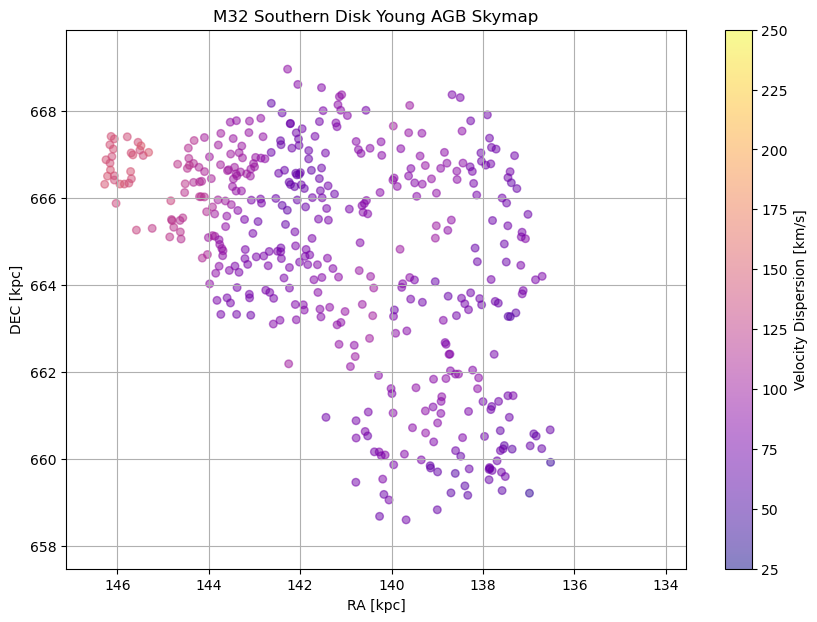

In [61]:
print(np.max(vel_disp_AGB_young))
print(np.min(vel_disp_AGB_young))

ra_kpc_AGB_young = np.tan(ra_AGB_young)*770
dec_kpc_AGB_young = np.tan(dec_AGB_young)*770

plt.figure(figsize=(10,7))
plt.scatter(ra_kpc_AGB_young, dec_kpc_AGB_young, s=30, c=vel_disp_AGB_young, cmap='plasma', alpha=0.5, vmin=25, vmax=250)
cbar = plt.colorbar()
cbar.set_label('Velocity Dispersion [km/s]')
plt.grid()
plt.xlabel("RA [kpc]")
plt.ylabel("DEC [kpc]")
plt.title("M32 Southern Disk Young AGB Skymap")

plt.ylim(657.470874, 669.8609)
plt.xlim(147.126009, 133.559247)


Text(0.5, 1.0, 'Age Group Velocity Dispersion Histogram')

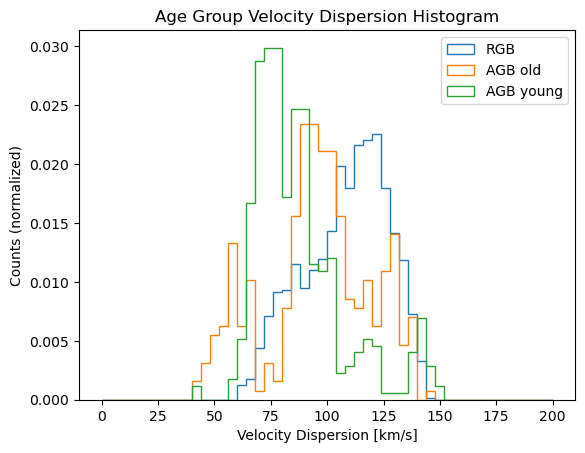

In [62]:
#plt.hist(vel_disp_MS, bins=50, histtype='step', density='true', range=(0,200), label='MS')
plt.hist(vel_disp_RGB, bins=50, histtype='step', density='true', range=(0,200), label='RGB')
plt.hist(vel_disp_AGB_old, bins=50, histtype='step', density='true', range=(0,200), label='AGB old')
plt.hist(vel_disp_AGB_young, bins=50, histtype='step', density='true', range=(0,200), label='AGB young')
plt.legend(loc='upper right')
plt.xlabel("Velocity Dispersion [km/s]")
plt.ylabel("Counts (normalized)")
plt.title("Age Group Velocity Dispersion Histogram")

87.19291545853861
95.77919760441885
108.37700470370524


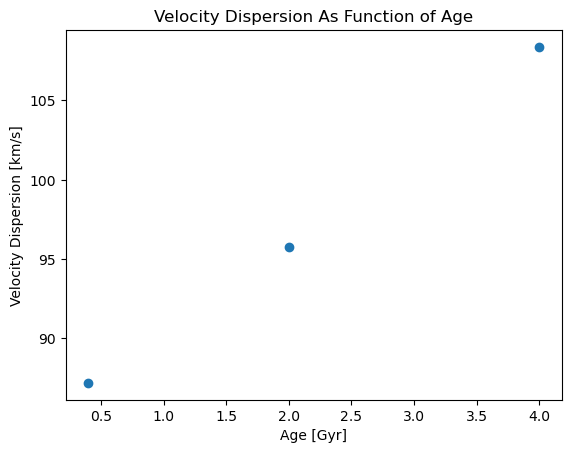

In [63]:
arr = [np.mean(vel_disp_RGB), np.mean(vel_disp_AGB_old), np.mean(vel_disp_AGB_young)]
ages = [4, 2, 0.4]

plt.scatter(ages, arr)
plt.xlabel("Age [Gyr]")
plt.ylabel("Velocity Dispersion [km/s]")
plt.title("Velocity Dispersion As Function of Age")

print(np.mean(vel_disp_AGB_young))
print(np.mean(vel_disp_AGB_old))
print(np.mean(vel_disp_RGB))

#plt.xlim(-0.5, 7)
#plt.ylim(0, 120)

[0.03 4.   2.   0.4 ]


Text(0.5, 1.0, 'Velocity Dispersion As Function of Age')

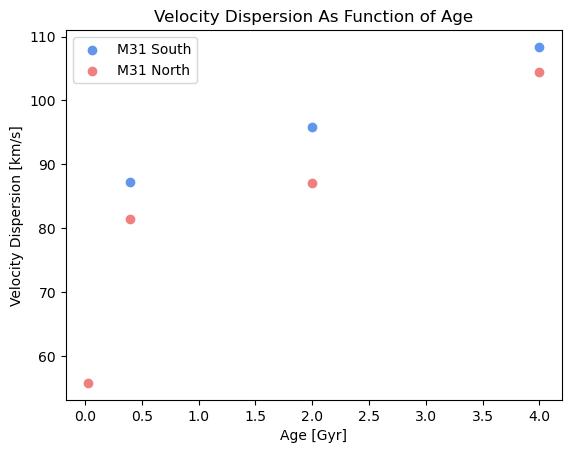

In [64]:
#combined
north_arr = np.load("M31_north_arr.npy")
north_ages = np.load("M31_north_ages.npy")

print(north_ages)
plt.scatter(ages, arr, c='cornflowerblue', label='M31 South')
plt.scatter(north_ages, north_arr, c='lightcoral', label='M31 North')


plt.xlabel("Age [Gyr]")
plt.ylabel("Velocity Dispersion [km/s]")
plt.legend()
plt.title("Velocity Dispersion As Function of Age")




In [65]:
ra_north = np.load("M31_north_ra.npy")
dec_north = np.load("M31_north_dec.npy")
vel_disp_north = np.load("M31_north_vel_disp.npy")
vhel_north = np.load("M31_north_vhel.npy")
vhel_err_north = np.load("M31_north_vhel_err.npy")

In [66]:
print(np.shape(vhel_north))
print(vhel_north[0])

(9830,)
-432.07834005355835


(164.292376, 132.7418)

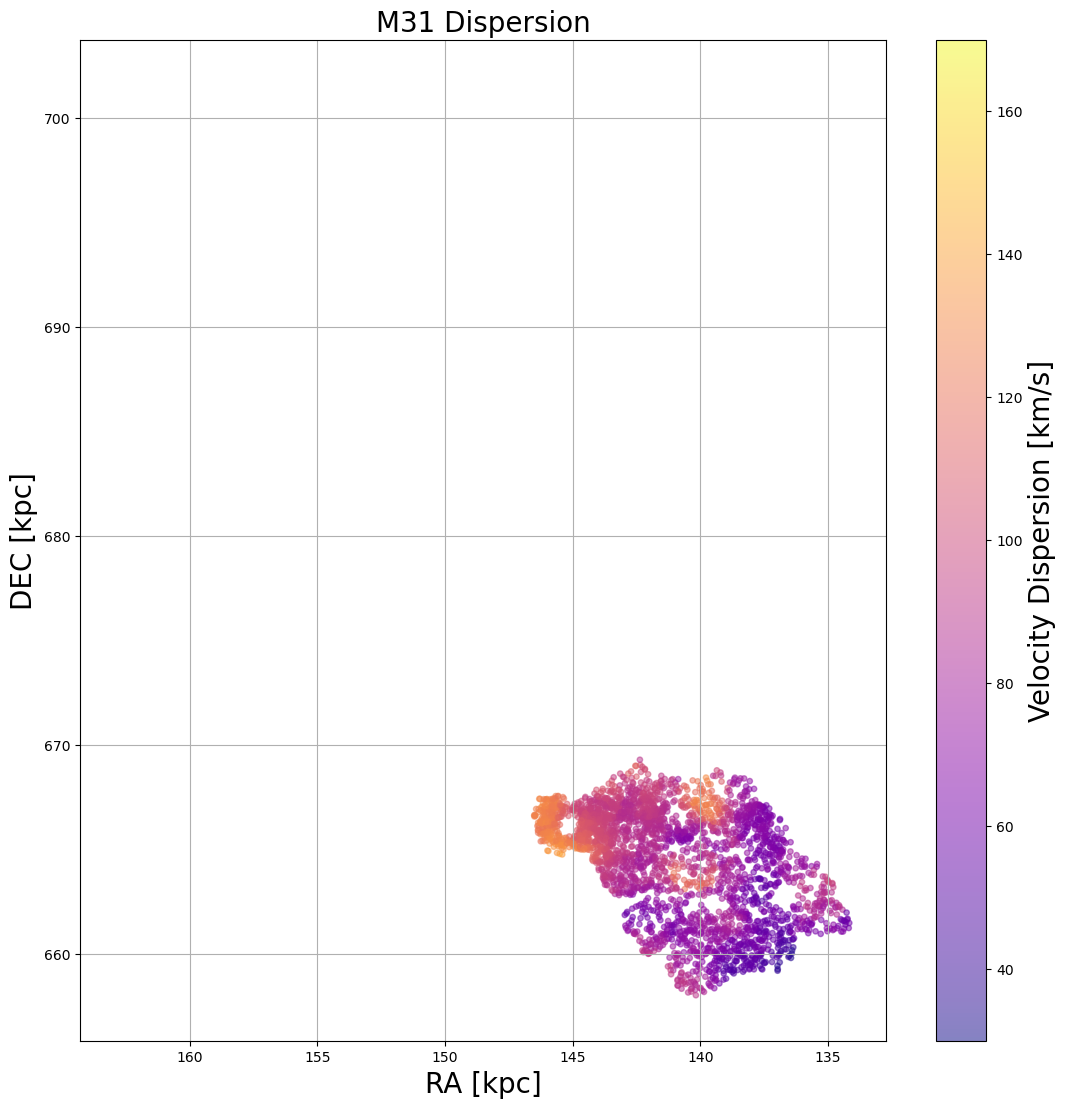

In [67]:
plt.figure(figsize=(13,13))
plt.scatter(ra_kpc, dec_kpc, s=15, c=vel_disp_all, cmap='plasma', alpha=0.5, vmin=30, vmax=170)
plt.scatter(ra_north, dec_north, s=15, c=vel_disp_north, cmap='plasma', alpha=0.5, vmin=30, vmax=170)

cbar = plt.colorbar()
cbar.set_label('Velocity Dispersion [km/s]', fontsize=20)
plt.grid()
plt.xlabel("RA [kpc]", fontsize=20)
plt.ylabel("DEC [kpc]", fontsize=20)
plt.title("M31 Dispersion", fontsize=20)

plt.ylim(655.8578588, 703.734232)
plt.xlim(164.292376, 132.7418)





In [68]:
#try to combine north and south data so dispersion isn't affected
#maybe: try to do rings for whole data set, see if dispersion as function of distance is affected


print(len(ra_all))
print(len(ra_north))
print(len(ra_comb))
print()
print(len(vhel))
print(len(vhel_north))
print(len(vhel_comb))

In [69]:
ra_comb = np.concatenate((ra_all, ra_north))
dec_comb = np.concatenate((dec_all, dec_north))
vel_disp_comb_inac = np.concatenate((vel_disp_all, vel_disp_north))
vhel_comb = np.concatenate((vhel, vhel_north))
vhel_err_comb = np.concatenate((vhel_err, vhel_err_north))


In [70]:
print(len(vhel))
print(len(vhel_north))

2900
9830


Text(0, 0.5, 'DEC [kpc')

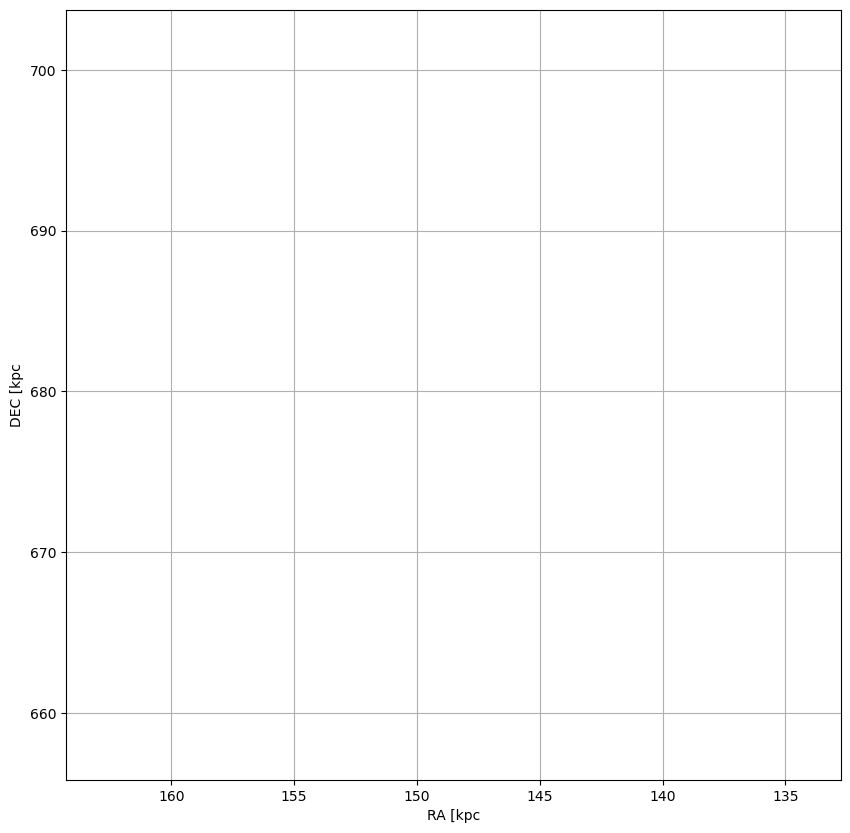

In [71]:
#checking for duplicate stars
plt.figure(figsize=(10,10))
plt.grid(True)

plt.plot(ra_comb, dec_comb, 'o', markersize=1, alpha=0.3)
plt.ylim(655.8578588, 703.734232)
plt.xlim(164.292376, 132.7418)
plt.xlabel("RA [kpc")
plt.ylabel("DEC [kpc")

In [72]:
def derek_AAAAA(index, radius, std=False):
    ra_code = ra_comb[index]
    dec_code = dec_comb[index]
    vel_code = vhel_comb[index]
    verr_code = vhel_err_comb[index]

    v_dis = []
    ra_dis = []
    dec_dis = []
    for i in range(len(ra_code)):
        Xc = ra_code[i]
        Yc = dec_code[i]
        r = (np.sin(Yc) * np.sin(dec_code) + np.cos(Yc) * np.cos(dec_code) * np.cos(np.abs(Xc - ra_code)))#distance of all points to (x and y)
        ang = np.arccos(r)
        
        in_circle = np.where(ang < radius)[0]
        if len(in_circle) > 15:
            weights = 1/(verr_code[in_circle])
                
            xbar = np.average(vel_code[in_circle], weights = weights)

            numerator = np.sum(weights*(vel_code[in_circle] - xbar)**2)
            denominator = (len(in_circle)-1)/len(in_circle)*np.sum(weights)
                
            dispersion = np.sqrt(numerator/denominator)
            print(dispersion)
            #vhel [stars_in_circle] the velocity of stars in my circle.
            v_dis.append(dispersion)
            ra_dis.append(Xc)
            dec_dis.append(Yc)
            
            
    return np.asarray(ra_dis), np.asarray(dec_dis), np.asarray(v_dis)

In [73]:
comb_stars = list(range(0, len(ra_comb)))

ra_whole, dec_whole, vel_disp_comb = derek_AAAAA(comb_stars, 200*4.84814e-6)

127.98292100662717
125.88911580283148
128.38529361778737
124.13793828822575
119.87686236213209
123.69458468722438
124.45621485530724
118.04025848620594
123.36749115864966
118.71109154636561
119.12853564684384
131.17986798245124
122.51132315175191
125.0288548588386
114.72049368116967
118.17427548665597
112.33119522185417
111.99413739522707
112.69444421723641
112.21567866669105
128.13164902398938
127.60540886553629
127.51288936011588
124.29954580089023
124.16508617936881
130.22424542910275
127.83940753896333
128.71855545279143
124.83473641121205
125.97432766639837
119.14566332950947
117.01328152266807
126.65522742867962
125.07105041781719
124.89619954460694
123.7944313876811
119.22315125454891
124.86442648308503
124.61523989296026
117.48736251716231
124.85764292970408
116.73569342321181
117.04946264991983
130.7850382057267
129.72714279169446
116.74736257535683
129.60519045449365
128.85243959977154
125.3214543997572
128.81681562594758
129.07020217095996
129.81432816492364
113.299274702736

/var/folders/rf/qb1kdfd52kdgjzt3dzgyx_lw0000gn/T/ipykernel_28255/58367169.py:14: RuntimeWarning: invalid value encountered in arccos
  ang = np.arccos(r)


125.63585899448344
113.46623745066904
122.46475694186188
123.09878847635356
116.43862275271637
110.47765599718926
120.84098360198935
124.96595142089537
108.31006236096339
118.0489355049606
119.18540441155675
128.92791337033677
116.84530100368099
106.71270733005541
108.26601385359994
127.58834194658122
105.41115991606985
106.74289118051676
106.96089196379873
112.06735872179775
131.85863556781686
131.16609338852706
132.95248535152882
131.3804069519843
114.42533199418266
118.5791534884623
128.885191551755
132.48474459136077
127.55508733857722
127.73172276489763
123.76823681311755
128.14929690313332
112.50743811321202
127.9624411659698
125.25059415242342
131.13892310467108
117.49650673064083
129.25641920604838
130.3550591524765
131.42609752228861
128.2203583807867
129.85890985656025
130.7640578326198
125.24353879253377
129.4421535695235
125.70975516995195
75.06200009983498
74.21518194194745
76.76425579392419
85.3499396290532
85.46221457958131
77.3974552418576
77.76411344182476
79.727462502

In [74]:
len(comb_stars)

12730

In [75]:
ra_comb_kpc = np.tan(ra_comb)*770
dec_comb_kpc = np.tan(dec_comb)*770

145.2784390996978
675.7276945267924


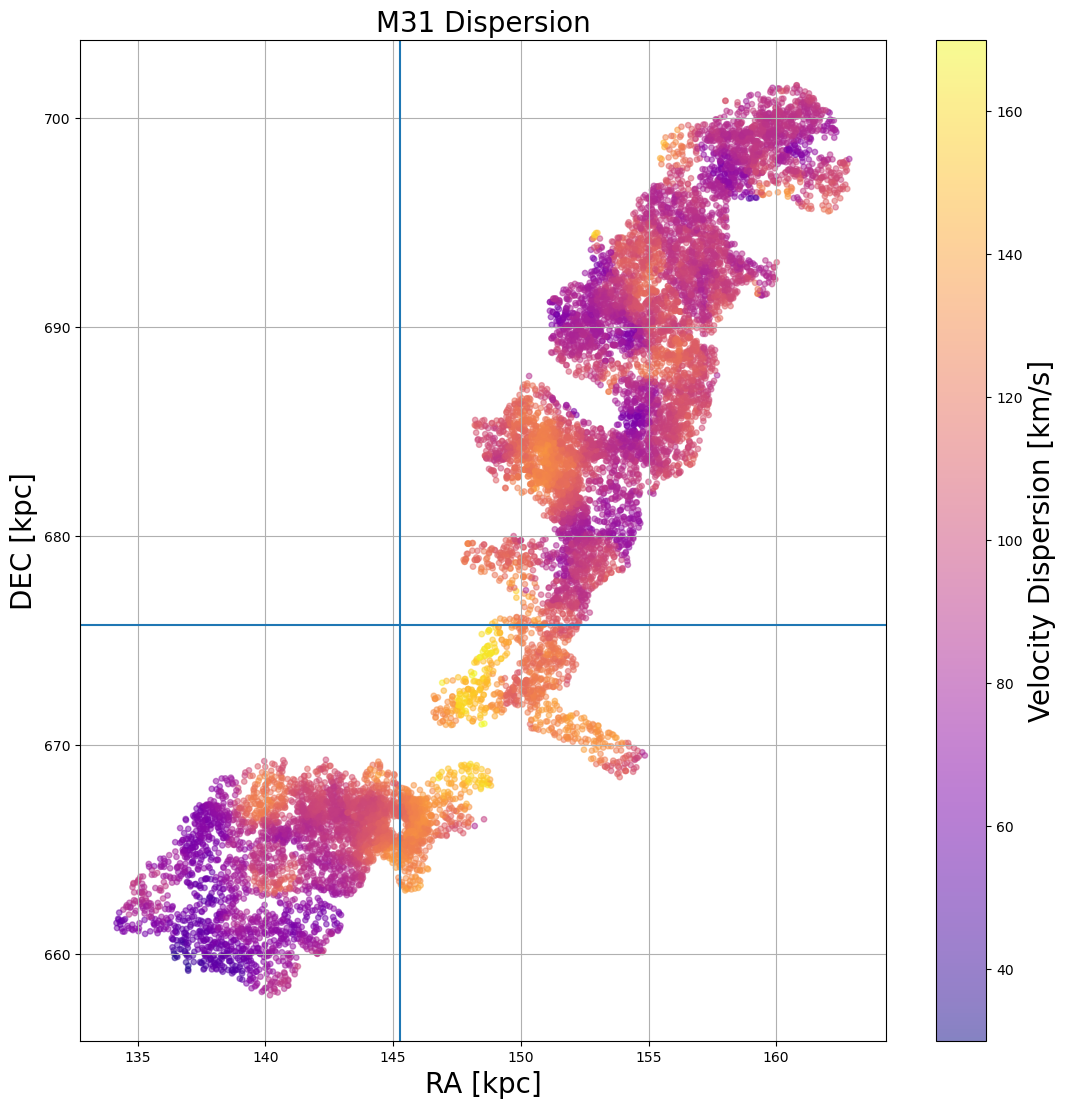

In [76]:

plt.figure(figsize=(13,13))
#plt.scatter(ra_kpc, dec_kpc, s=15, c=vel_disp_all, cmap='plasma', alpha=0.5, vmin=30, vmax=170)
#plt.scatter(ra_north, dec_north, s=15, c=vel_disp_north, cmap='plasma', alpha=0.5, vmin=30, vmax=170)

plt.scatter(ra_comb_kpc, dec_comb_kpc, s=15, c=vel_disp_comb, cmap='plasma', alpha=0.5, vmin=30, vmax=170)

cbar = plt.colorbar()
cbar.set_label('Velocity Dispersion [km/s]', fontsize=20)
plt.grid()
plt.xlabel("RA [kpc]", fontsize=20)
plt.ylabel("DEC [kpc]", fontsize=20)
plt.title("M31 Dispersion", fontsize=20)

print(np.tan(M31_rarad_center)*770)
print(np.tan(M31_decrad_center)*770)

plt.axvline(x=np.tan(M31_rarad_center)*770)
plt.axhline(y=np.tan(M31_decrad_center)*770)


#plt.ylim(655.8578588, 703.734232)
#plt.xlim(164.292376, 132.7418)

In [77]:
print(len(ra_kpc))
print(len(ra_north))
print(len(ra_comb_kpc))
print()
print(len(vhel))
print(len(vhel_north))
print(len(vhel_comb))

2900
9830
12730

2900
9830
12730


(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   2.,   1.,   1.,   3.,   6.,   1.,   2.,
          5.,  14.,  11.,  18.,  25.,  29.,  32.,  49.,  69., 110., 149.,
        143., 141., 150., 160., 154., 146., 135., 140., 143., 152., 145.,
        163., 148., 184., 152., 195., 151., 142., 155., 127., 137., 152.,
        149., 157., 165., 136., 167., 180., 202., 215., 256., 271., 272.,
        309., 292., 315., 338., 363., 412., 432., 469., 439., 439., 476.,
        435., 454., 365., 308., 252., 182., 143.,  98.,  58.,  39.,  26.,
         24.,  18.,   7.,   4.,   4.,   5.,   1.,   2.,   1.,   0.,   2.,
          2.]),
 array([-925.5248456 , -914.46485445, -903.40486329, -892.34487214,
        -881.28488098, -870.22488983, -859.16489867, -848.10490752,
        -837.04491636, -825.98492521, -814.92493405, -803.8649429 ,
        -792.80495174, -781.74496059, -770.68496943, -759.62497828,
        -748.56498713, -737.50499597, -726.445

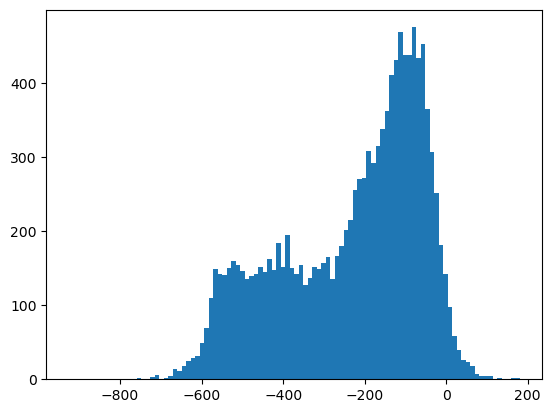

In [78]:
plt.hist(vhel_comb, bins=100)

-925.5248456001282
180.47426986694336
(132.74179191025166, 164.29237655142273)
(655.8578861388213, 703.7342314233144)


(164.292376, 132.74179)

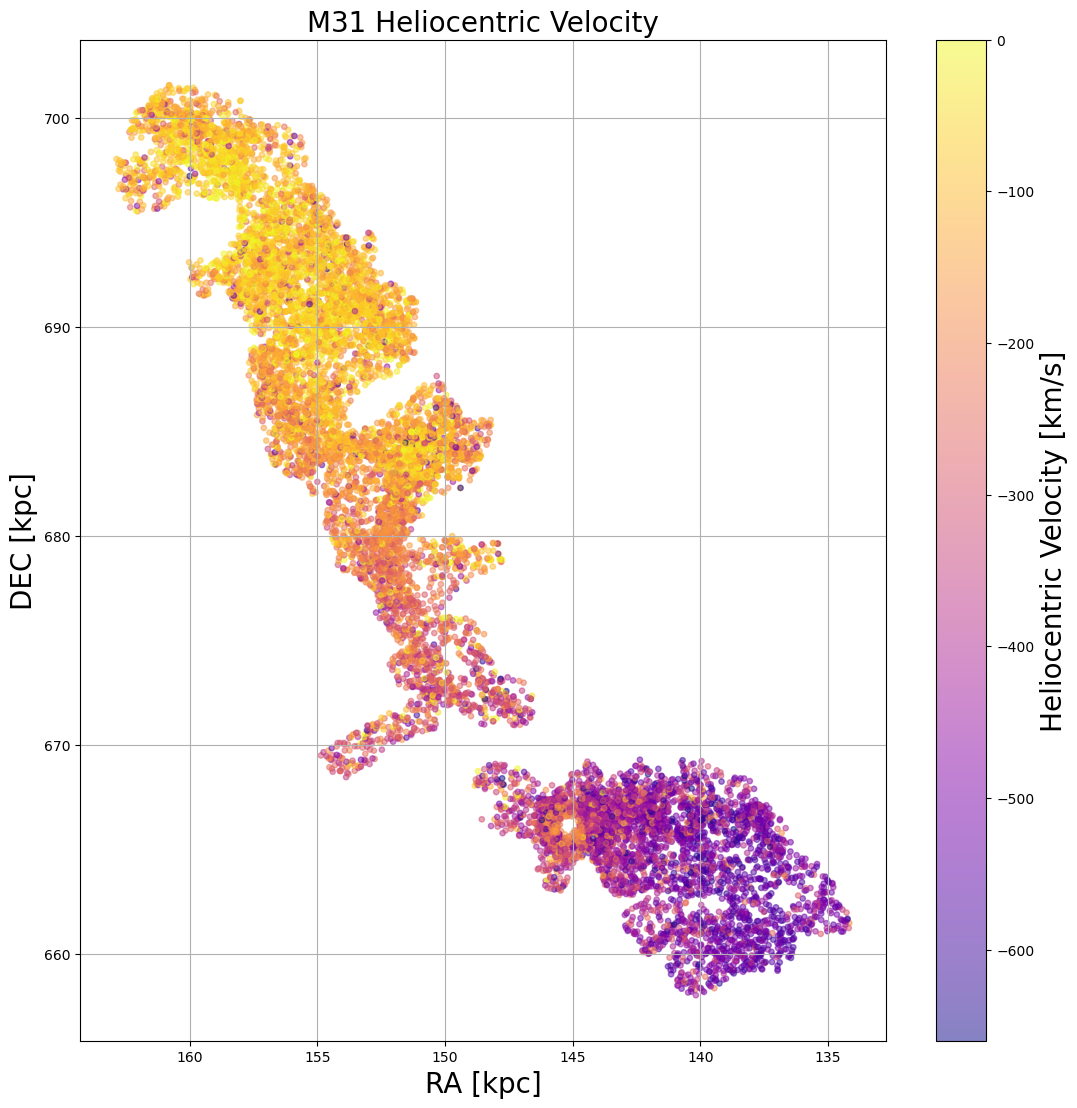

In [79]:
plt.figure(figsize=(13,13))
#plt.scatter(ra_kpc, dec_kpc, s=15, c=vel_disp_all, cmap='plasma', alpha=0.5, vmin=30, vmax=170)
#plt.scatter(ra_north, dec_north, s=15, c=vel_disp_north, cmap='plasma', alpha=0.5, vmin=30, vmax=170)


plt.scatter(ra_comb_kpc, dec_comb_kpc, s=15, c=vhel_comb, cmap='plasma', alpha=0.5, vmin=0, vmax=-600)

cbar = plt.colorbar()
cbar.set_label('Heliocentric Velocity [km/s]', fontsize=20)
plt.grid()
plt.xlabel("RA [kpc]", fontsize=20)
plt.ylabel("DEC [kpc]", fontsize=20)
plt.title("M31 Heliocentric Velocity", fontsize=20)

print(np.min(vhel_comb))
print(np.max(vhel_comb))

print(plt.xlim())
print(plt.ylim())
plt.xlim(164.292376, 132.74179)

#plt.axvline(x=np.tan(M31_rarad_center)*770)
#plt.axhline(y=np.tan(M31_decrad_center)*770)

In [80]:
star_dist_comb = []

for i in range(len(ra_comb)):
    
    centerX = M31_rarad_center
    centerY = M31_decrad_center
    
    #centerX = 0.18635
    #centerY = 0.7132
    
    
    
    delta_dist = (np.sin(centerY))*(np.sin(dec_comb))+(np.cos(centerY))*(np.cos(dec_comb))*(np.cos(np.abs(centerX-ra_comb)))
    dist = np.arccos(delta_dist)
    
    star_dist_comb.append(dist[i])
    #print(dist)

print(len(star_dist))
print("min:", np.min(star_dist))
print("max:", np.max(star_dist))

star_dist_comb= np.asarray(star_dist_comb)


2900
min: 0.00548095
max: 0.015022231


In [81]:
rings_comb = np.zeros(60)

rings_distance_comb = np.zeros(60)

increment_comb = 0.0005


for x in range(60):
    in_ring_comb = np.where((increment_comb*(x) < star_dist_comb) & (star_dist_comb < increment_comb*(x+1)))[0]
    rings_comb[x] = np.nanmean(np.asarray(vel_disp_comb)[in_ring_comb])
    rings_distance_comb[x] = (increment_comb*(x) + increment_comb*(x+1))/2
    

/var/folders/rf/qb1kdfd52kdgjzt3dzgyx_lw0000gn/T/ipykernel_28255/126287039.py:10: RuntimeWarning: Mean of empty slice
  rings_comb[x] = np.nanmean(np.asarray(vel_disp_comb)[in_ring_comb])


Text(0, 0.5, 'Velocity Dispersion [km/s]')

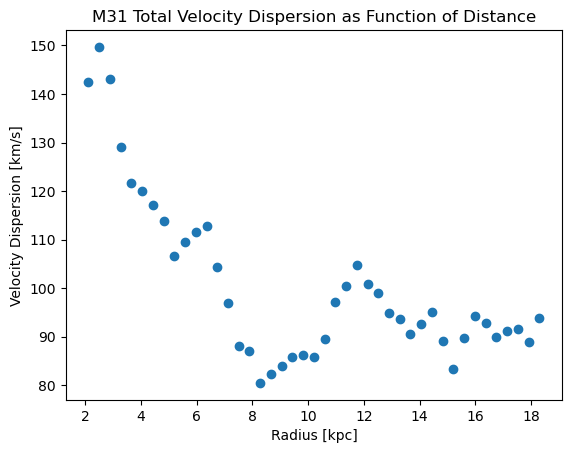

In [82]:

rings_distance_comb_kpc = np.tan(rings_distance_comb)*770

plt.scatter(rings_distance_comb_kpc, rings_comb)

plt.title("M31 Total Velocity Dispersion as Function of Distance")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity Dispersion [km/s]")


39
39
7.692555907652258
22.84104600938692


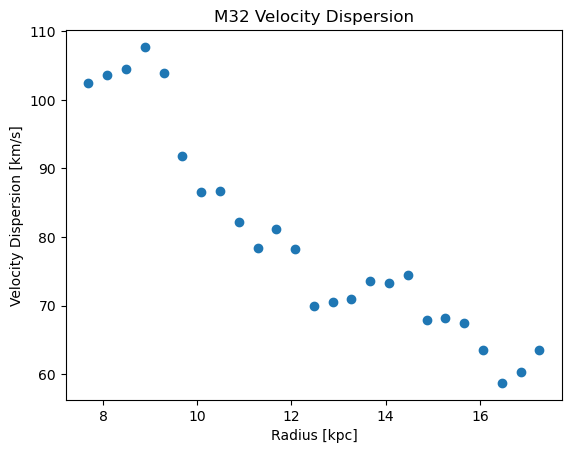

In [83]:
rings_distance_kpc = np.tan(rings_distance) * 770

print(len(rings_distance_kpc))

print(len(rings))

plt.scatter(rings_distance_kpc, rings)
plt.title("M32 Velocity Dispersion")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity Dispersion [km/s]")


print(np.min(rings_distance_kpc))
print(np.max(rings_distance_kpc))